In [202]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

from scipy import stats

###### constant parameters

In [235]:
TEST_SIZE = 0.2
RANDOM_STATE = 10
N_FOLDS = 3

## 1. Data loading

In [224]:
test = pd.read_csv("Sourses/test.csv").copy(deep = True)

df = pd.read_csv("Sourses/train.csv").copy(deep = True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [225]:
df.shape

(1460, 81)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [236]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,log_target
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,12.024057
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.399449
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,10.460271
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,11.775105
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,12.001512
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,12.273736
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,13.534474


<AxesSubplot:>

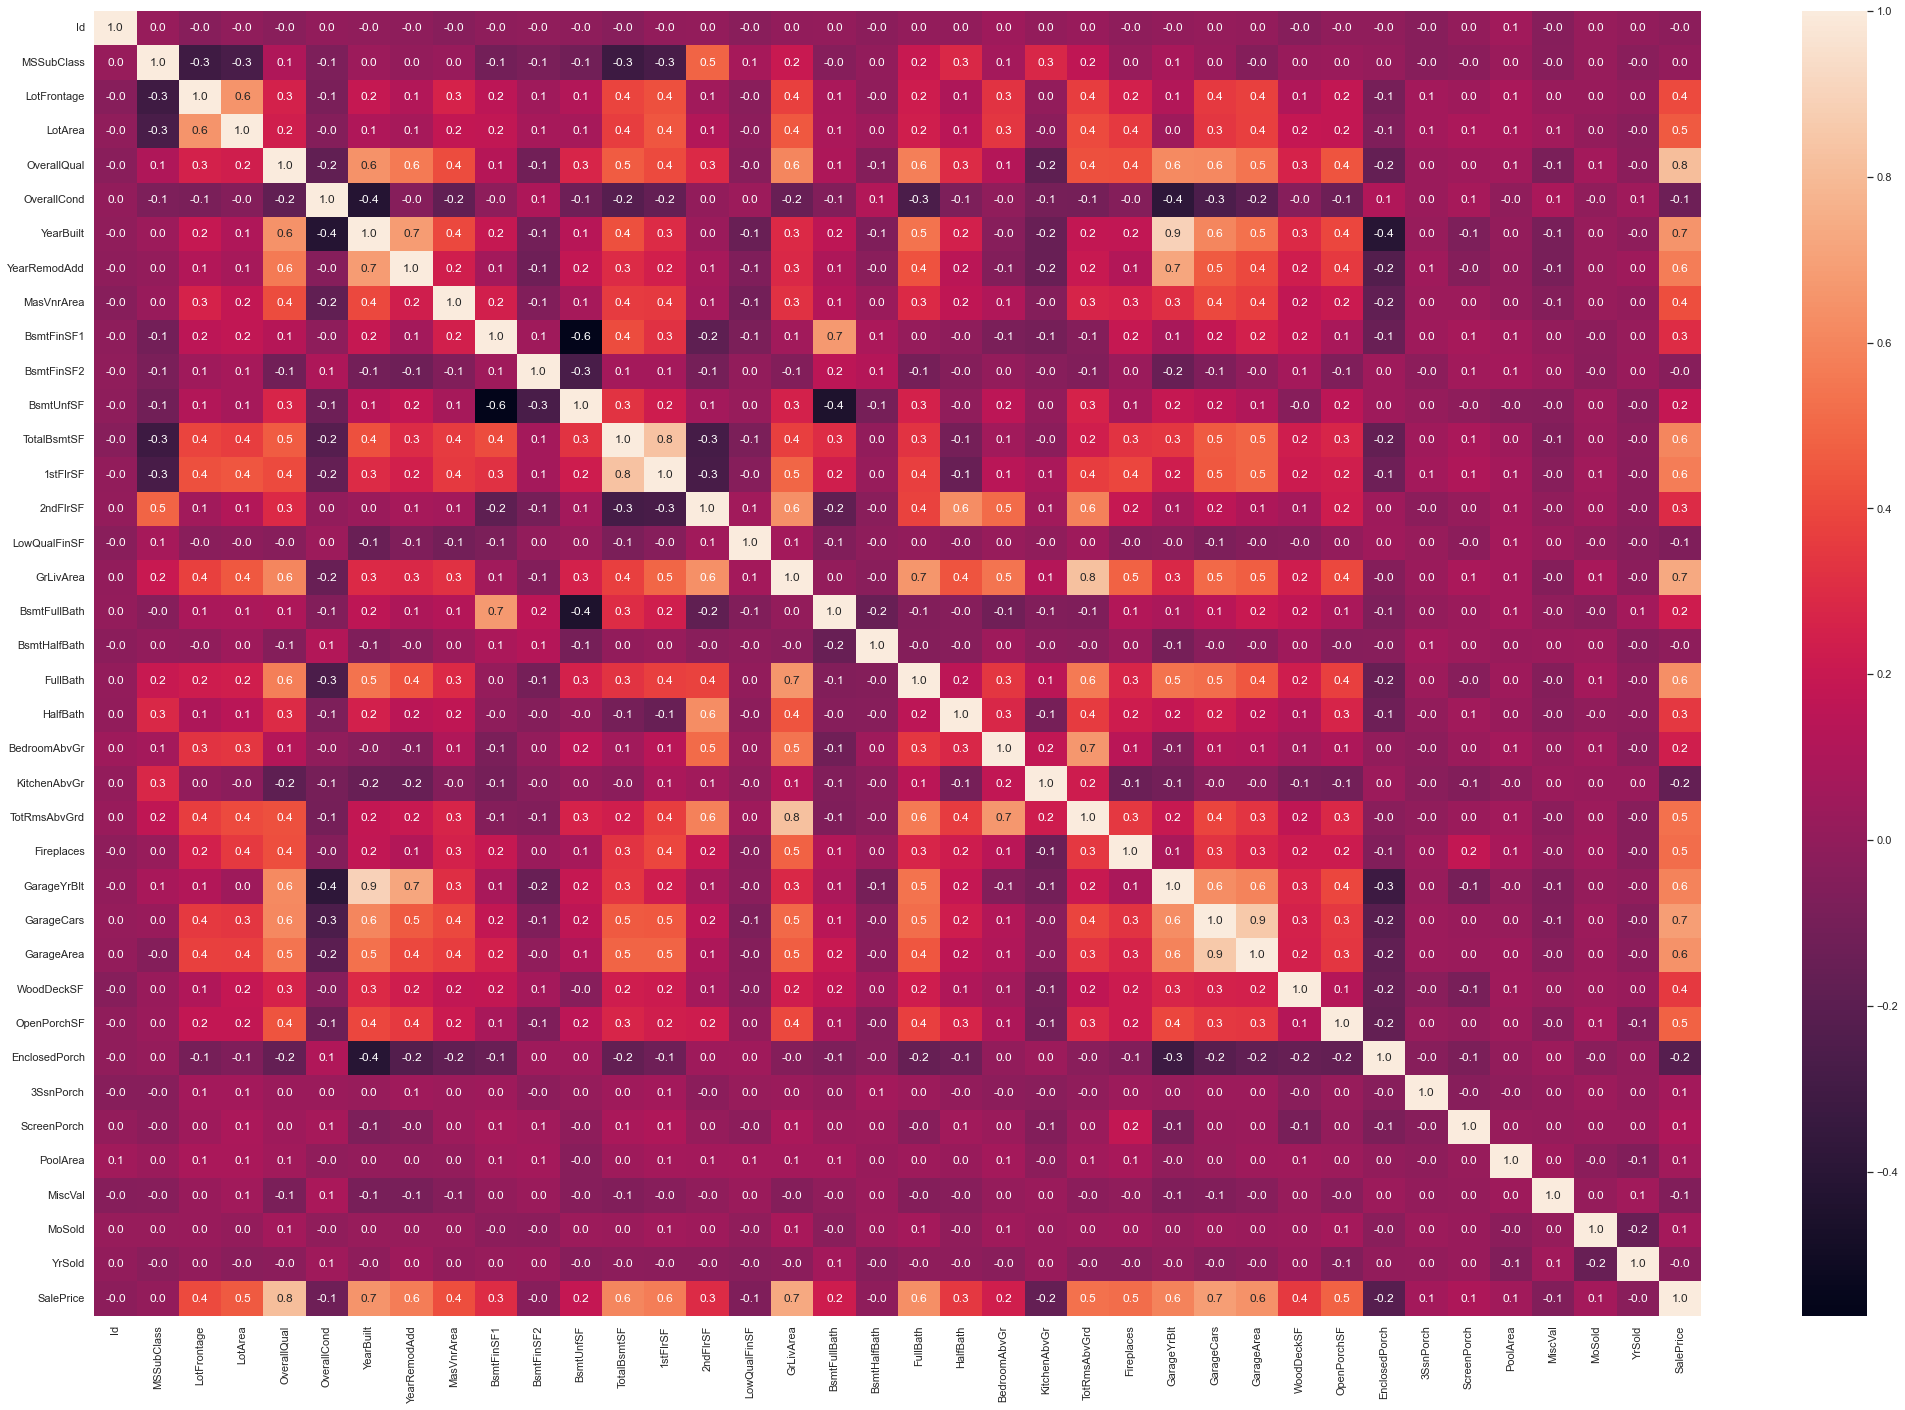

In [228]:
plt.figure(figsize = (36, 24))
sns.heatmap(df.corr(method = 'spearman'), annot = True, fmt = ".1f")

In [238]:
df = df.drop(['3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'MoSold'], axis=1)

<AxesSubplot:>

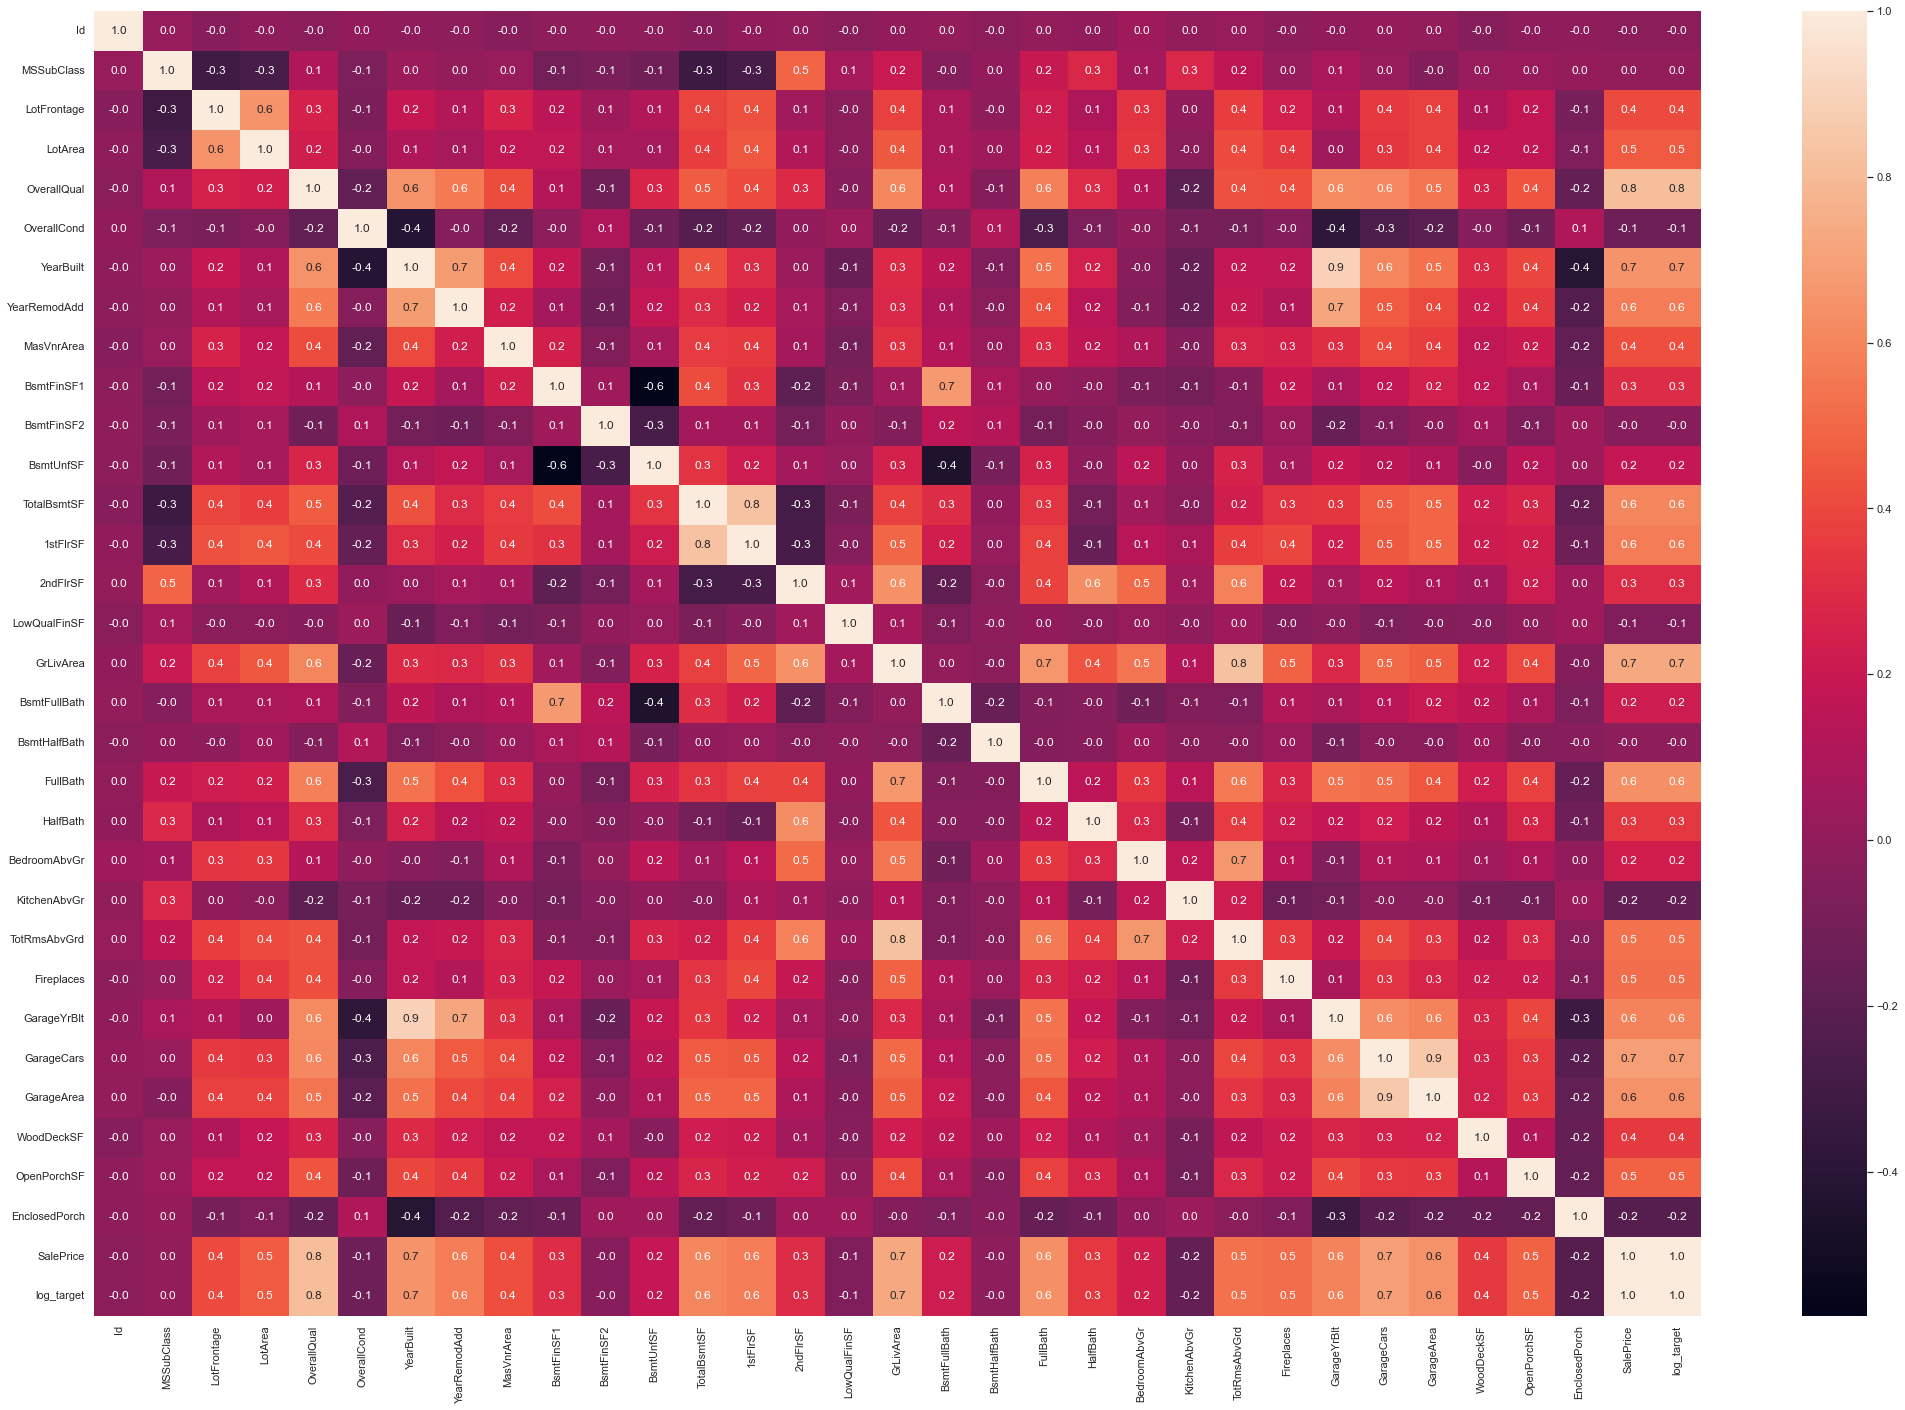

In [239]:
plt.figure(figsize = (36, 24))
sns.heatmap(df.corr(method = 'spearman'), annot = True, fmt = ".1f")

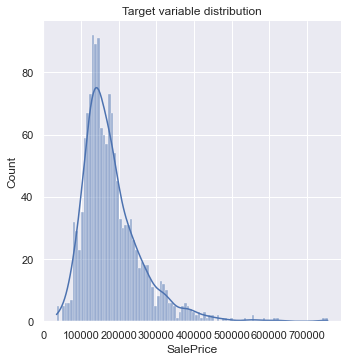

In [229]:
sns.displot(df["SalePrice"], bins=100, kde=True)
plt.title('Target variable distribution');

In [230]:
print(stats.shapiro(df.SalePrice))

ShapiroResult(statistic=0.869671642780304, pvalue=3.206247534576162e-33)


In [231]:
df = df.assign(log_target=np.log(df.SalePrice + 1))

In [232]:
print(stats.shapiro(df.log_target))

ShapiroResult(statistic=0.9912054538726807, pvalue=1.1467612637261482e-07)


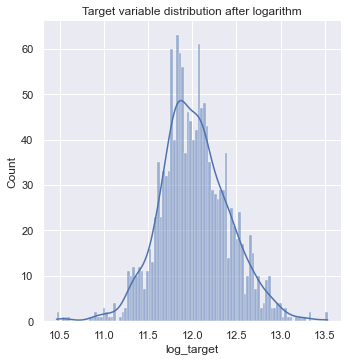

In [233]:
sns.displot(df.log_target, bins=100, kde=True)
plt.title('Target variable distribution after logarithm');

## 2. Modeling

In [212]:
features = ["LotArea", "KitchenAbvGr", "BedroomAbvGr", "YearRemodAdd", "Fireplaces", "MSSubClass", "1stFlrSF", "2ndFlrSF", "YearBuilt", "GrLivArea"]
X_train = df[features]
X_test = test[features]
y_train = train["SalePrice"]

In [213]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [214]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [215]:
submission = test[["Id"]]
submission

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [216]:
submission["SalePrice"] = predictions

C:\Users\User\AppData\Local\Temp\ipykernel_12812\2801724544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["SalePrice"] = predictions


In [217]:
params = pd.Series(model.coef_, index=X_train.columns)
params

LotArea             0.386693
KitchenAbvGr   -29302.512077
BedroomAbvGr   -12068.784255
YearRemodAdd      515.274988
Fireplaces       9878.854276
MSSubClass       -142.760799
1stFlrSF           72.452635
2ndFlrSF           46.022396
YearBuilt         666.495048
GrLivArea          41.562178
dtype: float64

In [218]:
np.random.seed(1)
err = np.std([model.fit(*resample(X_train, y_train)).coef_
              for i in range(1000)], 0)

In [219]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

               effect   error
LotArea           0.0     0.0
KitchenAbvGr -29303.0  6054.0
BedroomAbvGr -12069.0  3029.0
YearRemodAdd    515.0    71.0
Fireplaces     9879.0  3169.0
MSSubClass     -143.0    32.0
1stFlrSF         72.0    40.0
2ndFlrSF         46.0    37.0
YearBuilt       666.0    43.0
GrLivArea        42.0    36.0


In [220]:
submission

,Id,SalePrice
0,1461,112207.436756
1,1462,146984.558388
2,1463,213265.148872
3,1464,210199.629346
4,1465,175789.171624
...,...,...
1454,2915,94958.559749
1455,2916,94942.318662
1456,2917,155953.421083
1457,2918,135474.483948


In [221]:
submission.to_csv("submission.csv", index = None)

In [222]:
pd.read_csv("submission.csv")

,Id,SalePrice
0,1461,112207.436756
1,1462,146984.558388
2,1463,213265.148872
3,1464,210199.629346
4,1465,175789.171624
...,...,...
1454,2915,94958.559749
1455,2916,94942.318662
1456,2917,155953.421083
1457,2918,135474.483948
